<a href="https://colab.research.google.com/github/yeymix/bootcampIA/blob/main/DBSCAN_profe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

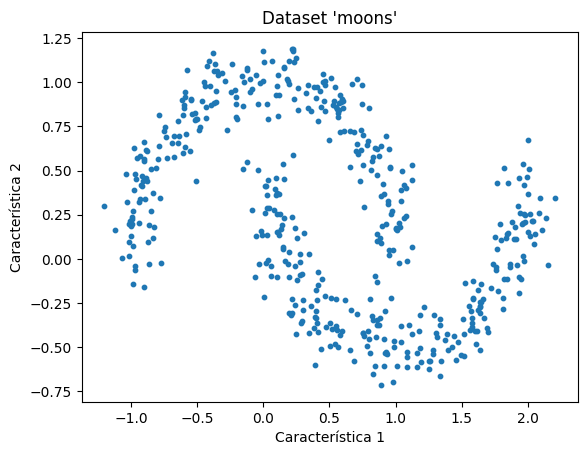

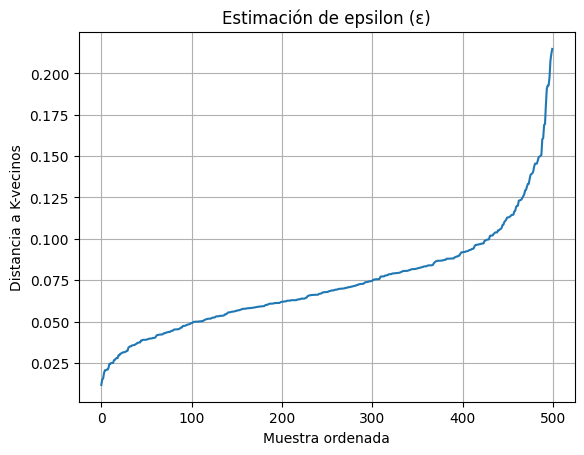

In [7]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Generamos el dataset 'moons'
X, y = make_moons(n_samples=500, noise=0.1)

# Visualizamos el dataset
plt.scatter(X[:, 0], X[:, 1], s=10, cmap='plasma')
plt.title("Dataset 'moons'")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

# Estimación de distancias K-vecinos
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Ordenamos las distancias para encontrar el "codo"
distances = np.sort(distances[:, 3], axis=0)  # Tomamos la cuarta columna (k=4)
plt.plot(distances)
plt.ylabel("Distancia a K-vecinos")
plt.xlabel("Muestra ordenada")
plt.title("Estimación de epsilon (ε)")
plt.grid(True)
plt.show()

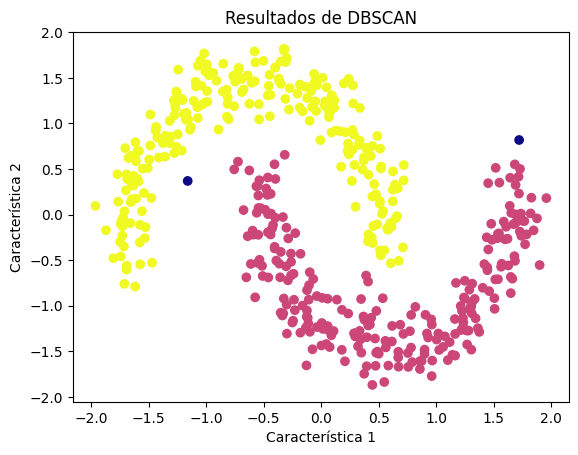

In [21]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalamos los datos si es necesario
X_scaled = StandardScaler().fit_transform(X)

# Aplicamos DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=9)
clusters = dbscan.fit_predict(X_scaled)

# Visualizamos los clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='plasma')
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Resultados de DBSCAN")
plt.show()

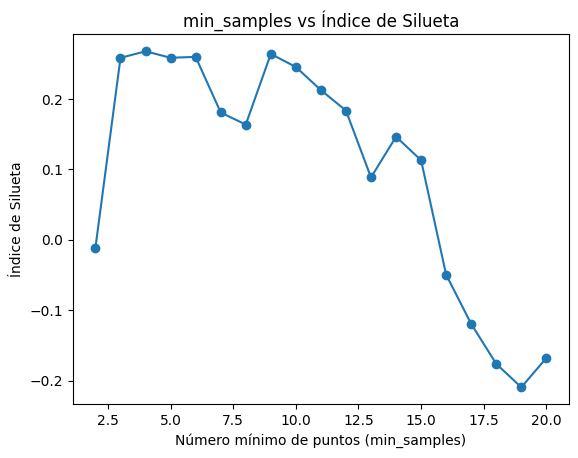

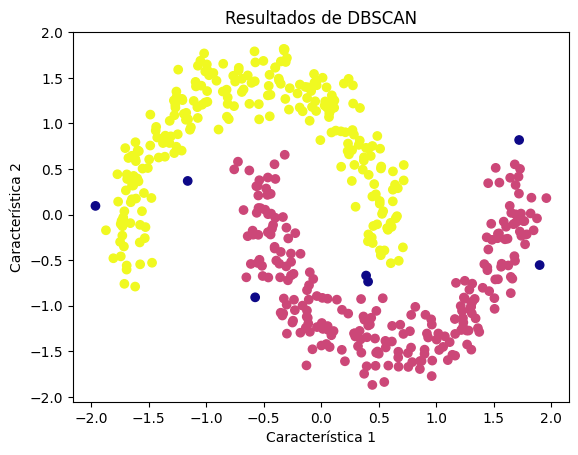

Índice de Silueta: 0.25802120946382473


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Escalamos los datos
X_scaled = StandardScaler().fit_transform(X)

# Rango de valores de min_samples
min_samples_range = range(2, 21)
silhouette_scores = []

# Fijamos un epsilon aproximado utilizando el método de los K-vecinos
epsilon = 0.2  # Valor determinado empíricamente para este dataset

# Aplicamos DBSCAN con diferentes valores de min_samples
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_scaled)

    # Filtramos el ruido antes de calcular el índice de silueta
    if len(set(clusters)) > 1:  # Al menos debe haber más de un cluster
        score = silhouette_score(X_scaled, clusters)
    else:
        score = -1  # Si no se forman clusters, asignamos -1
    silhouette_scores.append(score)

# Graficamos el número mínimo de puntos vs índice de silueta
plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.title("min_samples vs Índice de Silueta")
plt.xlabel("Número mínimo de puntos (min_samples)")
plt.ylabel("Índice de Silueta")
plt.show()


# In[82]:


dbscan = DBSCAN(eps=0.2, min_samples=3)
clusters = dbscan.fit_predict(X_scaled)

# Visualizamos los clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='plasma')
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.title("Resultados de DBSCAN")
plt.show()


# In[83]:


sil_score = silhouette_score(X_scaled, clusters)
print(f"Índice de Silueta: {sil_score}")